# MachineLearning

Klassifikationsproblem

Extrovertiert oder Introvertiert

Teilnehmer anhand ihrer Angaben in zwei Gruppen einteilen

Introvertiert: 1-2, Extrovertiert:3-5

Fragebogen: 1: sehr introvertiert, 5: sehr extrovertiert

***

In [51]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb  # data visualization library  
import matplotlib.pyplot as plt  # data visualization library 

In [52]:
filename = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(filename)

In [53]:
data["Introvertiert_Extrovertiert"]

0     3
1     3
2     4
3     3
4     3
     ..
57    2
58    3
59    3
60    3
61    2
Name: Introvertiert_Extrovertiert, Length: 62, dtype: int64

In [54]:
INFP_ESFJ = []

for i in data["Introvertiert_Extrovertiert"]:
    if(i == 1 or i == 2):
        INFP_ESFJ.append("Introvertiert")
    else:
        INFP_ESFJ.append("Extrovertiert")

data["Introvertiert_oder_Extrovertiert"] = INFP_ESFJ

<AxesSubplot:ylabel='None'>

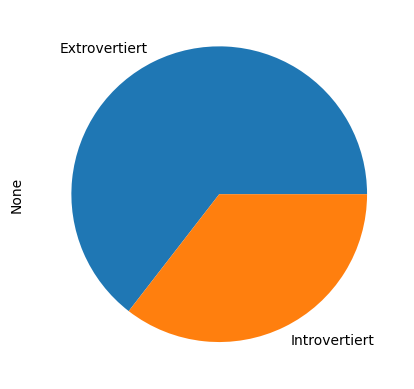

In [55]:
data.value_counts("Introvertiert_oder_Extrovertiert").plot(kind="pie")

## Klassifikationsproblem

Feature: Introvertiert oder Extrovertiert

Teilnehmer zuordnen, ob sie extroviertier oder introvertiert sind

In [56]:
x = data.select_dtypes(include='number') # Nur Feature mit Zahlenwerten verwenden
y = data["Introvertiert_oder_Extrovertiert"]

x.shape, y.shape 

((62, 59), (62,))

In [57]:
x.head()

,Alter,Sportlichkeit,Gesunde_Ernaehrung,Essen_gehen,Kochen,Feiern,Musik,Lesen,Darstellende_Kunst,Filme,...,Yoga,Kampfsport,Tanzen,Leichtathletik,Bouldern/Klettern,Schwimmen,Wassersport,Reiten,Wintersport,Rennrad/Mountainbike
0,28,4,4,3,4,3,5,4,3,3,...,1,0,0,0,1,0,0,0,0,1
1,26,3,4,4,5,2,4,2,3,4,...,1,0,0,0,1,0,0,0,0,1
2,24,2,5,4,4,3,5,2,3,4,...,1,0,1,0,1,0,0,0,0,0
3,23,5,2,4,4,2,3,3,2,4,...,0,0,0,1,1,0,0,0,1,0
4,24,3,4,3,2,1,3,4,2,5,...,0,0,0,0,1,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #testsize etwas vergrößert,wegen den wenigen Daten
                                                                                         #darf man das?

x_train.shape, x_test.shape

((43, 59), (19, 59))

In [59]:
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler().fit(x_train)

X_train_scaled = pd.DataFrame(scaler.transform(x_train),
                              columns=x.columns)
X_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns=x.columns)

In [60]:
X_train_scaled.head()

,Alter,Sportlichkeit,Gesunde_Ernaehrung,Essen_gehen,Kochen,Feiern,Musik,Lesen,Darstellende_Kunst,Filme,...,Yoga,Kampfsport,Tanzen,Leichtathletik,Bouldern/Klettern,Schwimmen,Wassersport,Reiten,Wintersport,Rennrad/Mountainbike
0,-1.323585,1.591324,-0.806296,1.192840,-1.124591,-1.561532,0.026556,1.499316,1.134563,1.349109,...,-0.586302,-0.514496,1.705606,2.483277,1.519109,-0.769800,-0.220863,-0.154303,-0.273861,-0.514496
1,-0.307261,-1.427511,-0.806296,0.187112,0.000000,0.303631,0.026556,-0.243132,1.134563,1.349109,...,-0.586302,-0.514496,1.705606,-0.402694,-0.658281,1.299038,-0.220863,-0.154303,-0.273861,-0.514496
2,-1.526850,1.591324,-0.806296,0.187112,-1.124591,1.236213,0.026556,-1.114356,-0.639481,0.294351,...,-0.586302,-0.514496,-0.586302,-0.402694,-0.658281,-0.769800,-0.220863,-0.154303,-0.273861,-0.514496
3,0.302534,-1.427511,0.638317,1.192840,1.124591,1.236213,0.026556,-0.243132,-0.639481,-0.760407,...,-0.586302,1.943651,1.705606,2.483277,-0.658281,1.299038,-0.220863,-0.154303,-0.273861,-0.514496
4,-0.307261,-1.427511,-0.806296,-0.818615,0.000000,-1.561532,1.168462,0.628092,1.134563,-0.760407,...,-0.586302,-0.514496,1.705606,-0.402694,-0.658281,-0.769800,-0.220863,-0.154303,-0.273861,-0.514496


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # specify your model parameters
knn.fit(X_train_scaled,y_train)  # train the model using data and labels

KNeighborsClassifier(n_neighbors=2)

In [62]:
prediction = knn.predict(X_test_scaled)
prediction

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3a02fc2050>
Traceback (most recent call last):
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/julian/devel/anaconda3/envs/data_science/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


array(['Extrovertiert', 'Extrovertiert', 'Extrovertiert', 'Extrovertiert',
       'Extrovertiert', 'Extrovertiert', 'Extrovertiert', 'Extrovertiert',
       'Extrovertiert', 'Extrovertiert', 'Extrovertiert', 'Extrovertiert',
       'Extrovertiert', 'Extrovertiert', 'Extrovertiert', 'Extrovertiert',
       'Introvertiert', 'Extrovertiert', 'Extrovertiert'], dtype=object)

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

array([[11,  0],
       [ 7,  1]])

In [64]:
knn.classes_

array(['Extrovertiert', 'Introvertiert'], dtype=object)

<AxesSubplot:>

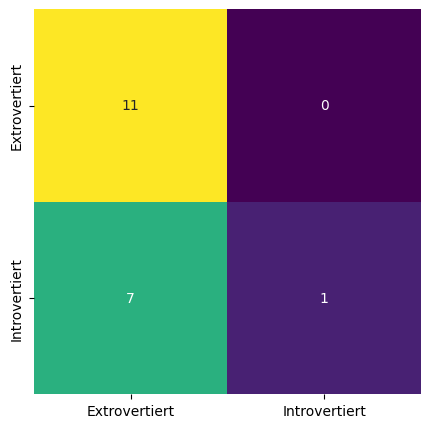

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test, prediction),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=knn.classes_,
           yticklabels=knn.classes_)

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [67]:
prediction = tree.predict(X_test_scaled)
prediction

array(['Introvertiert', 'Introvertiert', 'Introvertiert', 'Introvertiert',
       'Introvertiert', 'Introvertiert', 'Introvertiert', 'Introvertiert',
       'Introvertiert', 'Introvertiert', 'Introvertiert', 'Introvertiert',
       'Introvertiert', 'Introvertiert', 'Introvertiert', 'Introvertiert',
       'Introvertiert', 'Introvertiert', 'Introvertiert'], dtype=object)

<AxesSubplot:>

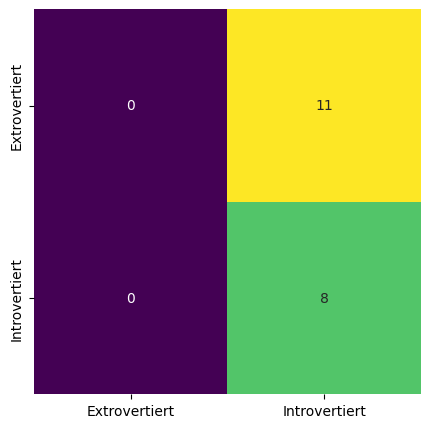

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test, prediction),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=tree.classes_,
           yticklabels=tree.classes_)

In [69]:
x_train.columns

Index(['Alter', 'Sportlichkeit', 'Gesunde_Ernaehrung', 'Essen_gehen', 'Kochen',
       'Feiern', 'Musik', 'Lesen', 'Darstellende_Kunst', 'Filme',
       'Bildende_Kunst', 'Museen', 'Videospiele', 'Soziale_Medien',
       'Technologie', 'Astronomie', 'Naturwissenschaften',
       'Soziales_Engagement', 'Soziale_Gerechtigkeit',
       'Introvertiert_Extrovertiert', 'FOMO', 'Spontan', 'Verwirrt',
       'Glücklich', 'Geduldig', 'Streitlustig', 'Abenteuerlustig',
       'Studium_Zweifel', 'Studium_Zufriedenheit', 'Akademische_Laufbahn',
       'Lerngruppe', 'Prokrastination', 'Abgaben_spaet',
       'Neugier_Lebensmittel', 'Natur', 'Verreisen', 'Handwerk',
       'Sprachnachrichten', 'Geld', 'Geschlecht_num', 'Position_num',
       'Studiengang_num', 'Basketball', 'Fußball', 'Handball', 'Football',
       'Hockey', 'Volleyball', 'Tennis', 'Yoga', 'Kampfsport', 'Tanzen',
       'Leichtathletik', 'Bouldern/Klettern', 'Schwimmen', 'Wassersport',
       'Reiten', 'Wintersport', 'Rennrad/Mounta